**단계 1:** 데이터를 읽고 파싱하는 작업

In [5]:
# 행과 열로 구성된 데이터를 사용하기 위해 필요한 패키지를 import합니다.
# 계층적 클러스터링을 하기 위해서 scipy 패키지의 linkage, dendrogram을 사용합니다.
# linkage는 계층적 클러스터를 하기 위해서, dendrogram은 클러스터링 결과를 트리 형태로 시각화하기 위해서 사용합니다.
# 본 예제에서는 pandas, sklearn, scipy를 사용합니다.

import pandas as pd
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 계층적 군집화에 사용할 데이터를 로드합니다.
# 데이터는 csv파일로 저장되어 있으므로 이를 위해서 read_csv 함수를 사용합니다.
fn = './company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

# 로드한 데이터를 파싱하는 작업을 진행합니다.
# 회사 이름과 변동폭을 따로 파싱합니다.
companies = list(stocks_df.index)
movements = stocks_df.values

**단계 2:** 데이터를 정재하는 과정, 완전연결로 군집화

In [6]:
# 데이터 (주가의 변동폭)를 정규화하는 과정을 진행합니다.
# 주가의 변동폭을 기록한 데이터를 정규화하여 군집화의 효과를 높입니다.
# 정규화 이후에, 완전연결로 군집화를 진행합니다. 
normalized_movements = normalize(movements)
mergings = linkage(normalized_movements, method='complete')

**단계 3:** 완전연결로 형성된 군집화의 결과를 그래프로 출력합니다.

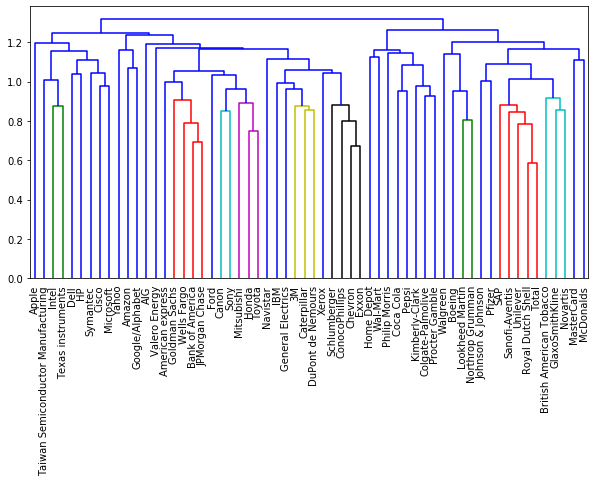

In [8]:
# 그래프의 크기를 설정합니다.
plt.figure(figsize=(10, 5))

# 군집화의 결과를 출력합니다.
# 이때 x축은 회사 이름을 출력합니다.
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90.,
    leaf_font_size=10)
plt.show()